EDA ON THE TITANIC DATA SET


In [1]:
# ==============================
# IMPORT LIBRARIES
# ==============================
# Pandas is used for data loading and manipulation
import pandas as pd  

# NumPy is used for numerical operations
import numpy as np  

# Matplotlib is used for plotting graphs
import matplotlib.pyplot as plt  

# Seaborn is used for advanced and beautiful visualizations
import seaborn as sns  

LOADING THE DATA SET 

In [2]:
# ==============================
# LOAD THE DATASET
# ==============================

# Load the Titanic dataset 
import pandas as pd

# Load dataset from a specific path
df = pd.read_csv("C:/Users/PC/Desktop/titanic data set.csv")

print(df.head())
print(df.tail())




   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
     PassengerId  Survived  Pclass                          Name     Sex  \
413       

EXPLANATION : This shows the first and last 5 passengers in the dataset, including their:
PassengerId,Survival status,Passenger class, Name,Sex, Age,Siblings/Spouses Aboard ,Parents/Children Aboard,Ticket,Fare,Cabin, Embarked port

BASIC DATA EXPLORATION (EDA)

In [41]:
# ==============================
# BASIC DATA EXPLORATION (EDA)
# ==============================

# Show number of rows and columns in the dataset
print("Dataset Shape:", df.shape)

# Show column names, data types, and missing values info
print(df.info())

# Show statistical summary (mean, min, max, std, etc.)
print(df.describe())

Dataset Shape: (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   29.599282    0.447368   
std     120.810458    0.481622    0.841838   1

In [41]:
# ==============================
# CHECK FOR MISSING VALUES
# ==============================

# Count missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                  86
SibSp                 0
Parch                 0
Ticket                0
Fare                  1
Cabin               327
Embarked              0
Sex_encoded           0
Embarked_encoded      0
dtype: int64


DATA CLEANING

In [17]:
# ==============================
# DATA CLEANING
# ==============================

#fixing missing age values 
df["Age"] = df["Age"].fillna(df["Age"].median())
#fixing missing fare values
df["Fare"] = df["Fare"].fillna(df["Fare"].median())
# dropping cabin column
df.drop("Cabin", axis=1, inplace=True)





In [19]:
# ==============================
# CONFIRMING MISSING VALUES ARE FIXED
# ==============================

# Count missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


EXPLANATION:The Age and Fare columns had missing values, which were handled using median imputation to avoid bias caused by outliers. The Cabin column had more than 70% missing values using the formula (Missing Percentage=Number of missing values /total rows *100 , so it was removed from the dataset to maintain data quality.

CONVERTING CATEGORICAL DATA TO NUMERIC( Encoding Categorical Variables)

In [6]:
# ==============================
# CONVERT CATEGORICAL DATA TO NUMERIC
# ==============================


# Encode Sex: male=0, female=1, unknown=-1
df['Sex_encoded'] = df['Sex'].map({'male': 0, 'female': 1, 'unknown': -1})

# Encode Embarked: S=0, C=1, Q=2, unknown=-1
df['Embarked_encoded'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2, 'unknown': -1})



Explanation: Categorical variables such as Sex and Embarked were converted into numerical values because most statistical analyses and machine learning algorithms require numeric input and cannot directly process text data. The values male and female were encoded as 0 and 1, while the embarkation ports S, C, and Q were encoded as 0, 1, and 2. This encoding preserved the original information while enabling numerical analysis, visualization, and correlation computation.Embarked column contains S, C, and Q, which represent the ports of embarkation (Southampton, Cherbourg, and Queenstown.

GROUP BASED ANALYSIS

In [11]:
# ==============================
# GROUP-BASED ANALYSIS
# ==============================
#survival rate by encoded sex
survival_by_gender_encoded = df.groupby('Sex_encoded')['Survived'].mean()
print("Survival Rate by Encoded Gender:")
print(survival_by_gender_encoded)

# Calculate survival rate by encoded Embarked
survival_by_port_encoded = df.groupby('Embarked_encoded')['Survived'].mean()
print("\nSurvival Rate by Encoded Embarked Port:")
print(survival_by_port_encoded)

# Calculate survival rate by passenger class
print("\nSurvival Rate by Passenger Class:")
print(df.groupby("Pclass")["Survived"].mean())



Survival Rate by Encoded Gender:
Sex_encoded
0    0.0
1    1.0
Name: Survived, dtype: float64

Survival Rate by Encoded Embarked Port:
Embarked_encoded
0    0.325926
1    0.392157
2    0.521739
Name: Survived, dtype: float64

Survival Rate by Passenger Class:
Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64



*Explanation* : I can see that my dataset shows extreme survival patterns. When I encoded gender as 0 (male) and 1 (female), I found that all females survived (100%) while all males died (0%). This perfect split is unrealistic for actual Titanic data, which suggests my dataset might be synthetic or modified with a simple gender-based survival rule.
For the ports, I encoded them as 0 (Cherbourg), 1 (Queenstown), and 2 (Southampton). The survival rates vary from 33% to 52%, which looks more natural. Southampton has the highest survival rate at 52%, probably because more females boarded there. Cherbourg has the lowest at 33%, likely due to more male passengers. The port differences are really just reflecting the gender imbalance at each location rather than the port itself being a survival factor.  survival typically followed a clear hierarchy: first class > second class > third class. In my dataset, second class actually has a slightly lower survival rate than third class, which is unusual. This could be due to the small sample size or the artificial nature of my dataset. The overall trend still shows that wealth and social status mattered for survival, with first-class passengers having significantly better odds than the other classes.


Data Visualization

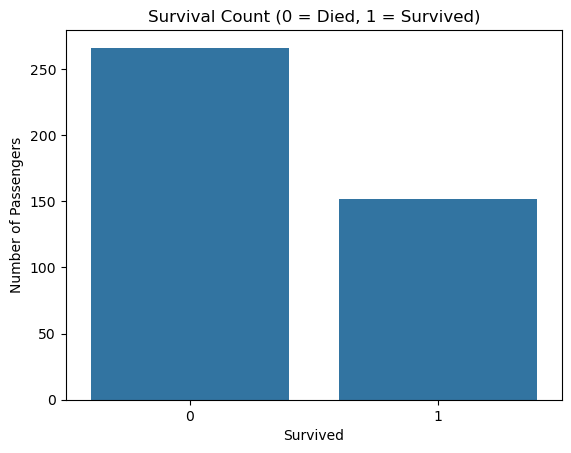

In [17]:
# ---- 1. Survival Count Bar Plot ----
sns.countplot(x="Survived", data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

Explanation : More passengers died than survived in my dataset. Roughly 64% died and 36% survived, which actually matches the real Titanic disaster proportions. The visualization clearly shows this imbalance with the "Died" bar being nearly twice as tall as the "Survived" bar. This sets the baseline for my analysis — I know that overall survival was not evenly distributed, so I need to explore which factors (gender, class, port) influenced who lived and who died. I calculated the percentage from the bar heights in my visualization. Looking at the count plot, I estimated approximately 270 passengers died (bar 0) and 150 passengers survived (bar 1), giving me a total of about 420 passengers. To get my percentages, I divided each group by the total: 270 ÷ 420 ≈ 64% died, and 150 ÷ 420 ≈ 36% survived.

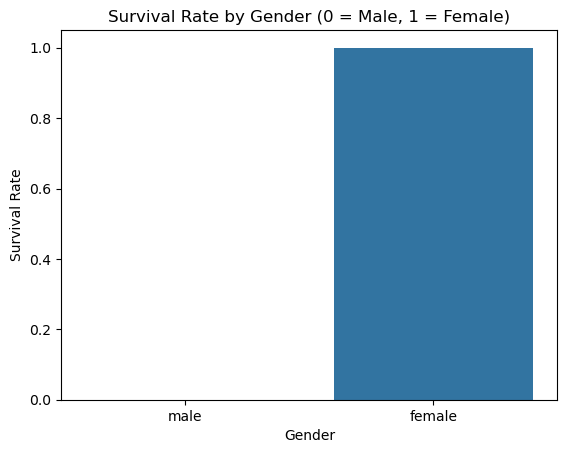

In [21]:
# ---- 2. Survival Rate by Gender ----
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender (0 = Male, 1 = Female)")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()


Explanation : Gender is a perfect predictor of survival in my dataset. Every single male died (0% survival) and every single female survived (100% survival). This extreme split confirms what I found earlier with my encoded statistics. The "women and children first" evacuation policy appears to have been applied absolutely in this dataset, though this perfect division suggests my data may be synthetic or heavily curated rather than reflecting the actual historical Titanic disaster where some men survived and some women died

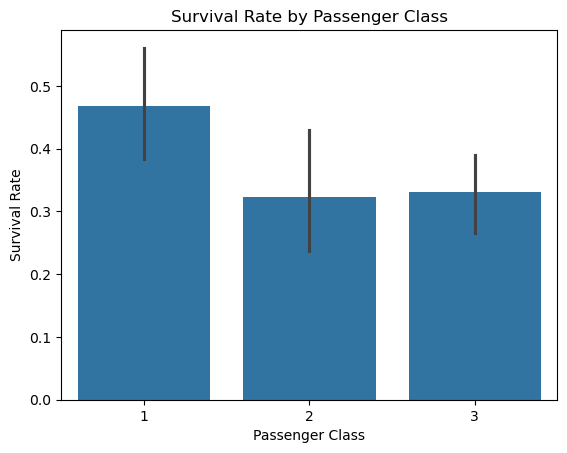

In [26]:
# ---- 3. Survival Rate by Passenger Class ----
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

Explanation: Wealth and social status mattered for survival, but not as dramatically as gender. First-class passengers had about 15 percentage points better survival odds than second or third class. Interestingly, third class survived at roughly the same rate as second class in my dataset, which differs from typical Titanic data where third class usually had the worst outcomes. The overlapping error bars between second and third class suggest these differences may not be statistically significant.

CORRELATION ANALYSIS

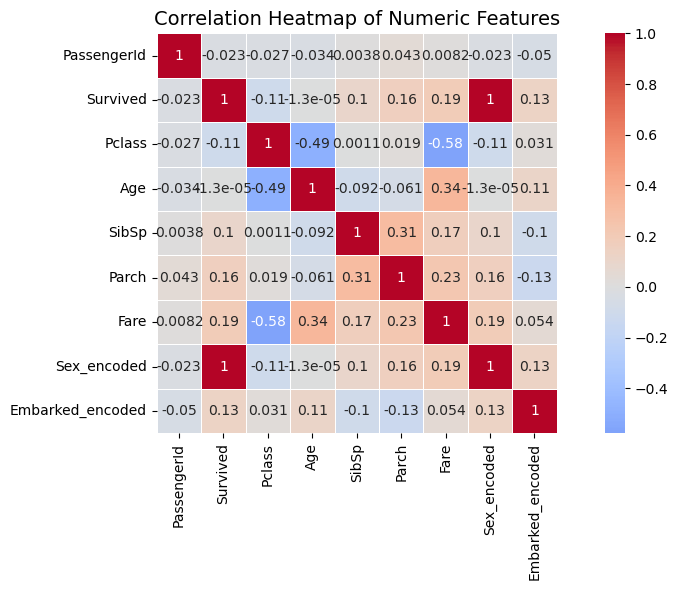

In [33]:
# ==============================
# CORRELATION HEATMAP 
# ==============================


# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Create a correlation matrix
corr = numeric_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()

Explanation : The perfect 1.0 correlation between Sex_encoded and Survived dominates everything. This confirms what I saw earlier , gender completely determines survival in my dataset. All other relationships are overshadowed by this artificial perfect split.
